In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas
import itertools
import copy
import sys

In [2]:
fileDir = "./outputMAE/"
maeList = [os.path.join(fileDir,x) for x in os.listdir(fileDir)]

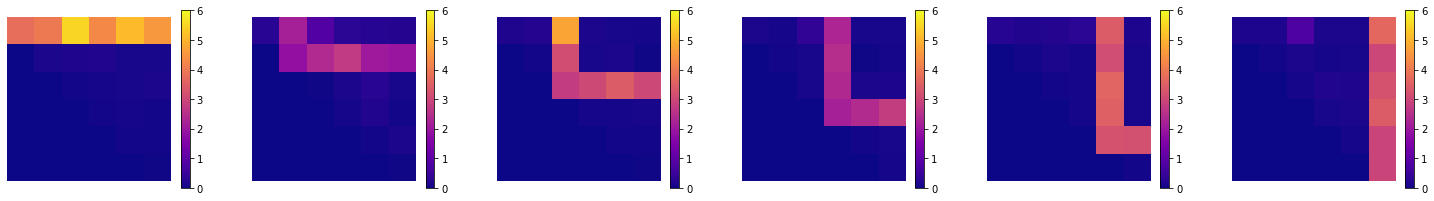

In [3]:
plt.rcParams["figure.figsize"] = [6.4*4,4.8*4]

for mae in maeList:
    arr = np.load(mae)

    fig,ax = plt.subplots(1,arr.shape[0])
    for i in range(arr.shape[0]):
        im = ax[i].imshow(arr[i,:,:],cmap="plasma",vmax=6)
        ax[i].axis("off")
        fig.colorbar(im,ax=ax[i],shrink=0.17)

    plt.show()
    break

In [4]:
maeList[0]

'./outputMAE/1009520_20254_2_0.npy'

In [22]:

df = []
keys = []
knNums = list(itertools.combinations_with_replacement([0,1,2,3,4,5],2))
for mae in maeList:
    arr = np.load(mae)

    eid = mae.split("/")
    tempDict = {"Eid": eid[-1][:7]}
    for kn0,kn1 in knNums:
        for i in range(arr.shape[0]):
            tempDict["Ch_{}_Kn_{}{}".format(i,kn0,kn1)] = arr[i,kn0,kn1]
            keys.append("Ch_{}_Kn_{}{}".format(i,kn0,kn1))
    df.append(tempDict)


df = pandas.DataFrame(df)

df

,Eid,Ch_0_Kn_00,Ch_1_Kn_00,Ch_2_Kn_00,Ch_3_Kn_00,Ch_4_Kn_00,Ch_5_Kn_00,Ch_0_Kn_01,Ch_1_Kn_01,Ch_2_Kn_01,...,Ch_2_Kn_45,Ch_3_Kn_45,Ch_4_Kn_45,Ch_5_Kn_45,Ch_0_Kn_55,Ch_1_Kn_55,Ch_2_Kn_55,Ch_3_Kn_55,Ch_4_Kn_55,Ch_5_Kn_55
0,1009520,3.814489,0.296626,0.166204,0.135620,0.247318,0.144027,4.023733,2.200176,0.233875,...,0.055902,0.103593,3.199229,2.969116,0.038198,0.033411,0.025942,0.083309,0.069869,2.962070
1,1016068,2.024219,0.296438,0.371910,0.185139,0.124114,0.120713,2.135675,0.911397,0.066185,...,0.046211,0.114580,1.275698,1.045913,0.046339,0.018969,0.020361,0.118666,0.082001,1.030929
2,1021871,1.453968,0.719356,0.640820,0.379775,0.307125,0.340274,1.976789,1.732213,0.704213,...,0.080871,0.094313,1.100798,1.270621,0.043606,0.067675,0.035980,0.081318,0.075422,1.153450
3,1031579,3.268277,0.654306,0.274154,0.305366,0.258828,0.125363,3.330253,2.232255,1.569591,...,0.101658,0.110817,1.994084,2.232101,0.084702,0.128341,0.146130,0.110232,0.100381,2.162222
4,1036691,5.226225,0.823022,0.578020,0.315352,0.585165,0.223385,5.427408,3.529687,3.013067,...,0.057230,0.117677,3.629992,3.426998,0.054462,0.075184,0.040630,0.089893,0.097511,3.243239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6021011,2.135691,0.934632,0.532156,0.468973,0.276399,0.491980,2.730059,2.051902,1.228594,...,0.152532,0.094654,1.224051,1.579476,0.041530,0.055416,0.035782,0.081073,0.073593,1.525689
996,6021919,2.007716,0.622313,0.566647,0.385242,0.379683,0.382353,2.213953,1.543062,1.442134,...,0.055163,0.080416,1.303245,1.627841,0.035852,0.027707,0.021593,0.080114,0.077234,1.535025
997,6022224,3.519126,0.427576,0.225608,0.114131,0.219241,0.172384,3.758765,2.306918,0.226881,...,0.047285,0.073334,2.154378,1.848982,0.047999,0.036038,0.026045,0.080263,0.074521,1.790499
998,6024254,3.526022,1.207418,0.933039,0.907834,0.548772,0.657726,3.757184,2.435724,3.382067,...,0.090167,0.169474,2.102132,2.121140,0.054500,0.054244,0.082709,0.119352,0.099895,2.100548


## Norm by column

In [27]:
dfNorm = copy.deepcopy(df)
for k in keys:
    dfNorm[k] = (dfNorm[k]-dfNorm[k].min())/(dfNorm[k].max()-dfNorm[k].min())

dfNorm

,Eid,Ch_0_Kn_00,Ch_1_Kn_00,Ch_2_Kn_00,Ch_3_Kn_00,Ch_4_Kn_00,Ch_5_Kn_00,Ch_0_Kn_01,Ch_1_Kn_01,Ch_2_Kn_01,...,Ch_2_Kn_45,Ch_3_Kn_45,Ch_4_Kn_45,Ch_5_Kn_45,Ch_0_Kn_55,Ch_1_Kn_55,Ch_2_Kn_55,Ch_3_Kn_55,Ch_4_Kn_55,Ch_5_Kn_55
0,1009520,0.380805,0.054255,0.027423,0.022461,0.065459,0.030361,0.377702,0.259864,0.033122,...,0.072793,0.131235,0.543918,0.507452,0.007184,0.026780,0.017110,0.054922,0.011453,0.520669
1,1016068,0.142269,0.054203,0.077904,0.042686,0.010785,0.021193,0.133579,0.000000,0.000000,...,0.043163,0.167110,0.141104,0.089707,0.013365,0.004210,0.007661,0.218207,0.034275,0.085667
2,1021871,0.066289,0.169813,0.143895,0.122178,0.092000,0.107532,0.113036,0.165506,0.126023,...,0.149125,0.100938,0.104478,0.138516,0.011289,0.080328,0.034103,0.045725,0.021899,0.113266
3,1031579,0.308028,0.152031,0.053914,0.091788,0.070568,0.023021,0.288036,0.266332,0.296951,...,0.212675,0.154822,0.291544,0.347363,0.042489,0.175139,0.220582,0.179257,0.068846,0.340498
4,1036691,0.568905,0.198151,0.128484,0.095867,0.215386,0.061567,0.559194,0.527941,0.582065,...,0.076852,0.177220,0.634126,0.606910,0.019531,0.092064,0.041977,0.085327,0.063449,0.584004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6021011,0.157122,0.228661,0.117229,0.158609,0.078365,0.167187,0.210432,0.229966,0.229598,...,0.368208,0.102049,0.130288,0.205604,0.009714,0.061169,0.033768,0.044596,0.018458,0.197115
996,6021919,0.140071,0.143285,0.125693,0.124411,0.124199,0.124079,0.143700,0.127366,0.271776,...,0.070532,0.055563,0.146873,0.216109,0.005403,0.017866,0.009747,0.040164,0.025308,0.199218
997,6022224,0.341451,0.090052,0.042001,0.013685,0.053000,0.041512,0.343442,0.281387,0.031740,...,0.046449,0.032440,0.325112,0.264144,0.014624,0.030886,0.017285,0.040853,0.020204,0.256765
998,6024254,0.342370,0.303230,0.215607,0.337847,0.199236,0.232364,0.343237,0.307359,0.654950,...,0.177545,0.346341,0.314171,0.323260,0.019560,0.059339,0.113213,0.221375,0.067931,0.326606


In [30]:
sumErr = []
for i,j in df.iterrows():
    sys.stdout.write("\r[{}/999]".format(i))
    sumErr.append(np.sum([j[k] for k in keys]))

print(len(sumErr))
dfNorm["Sum Norm Err"] = sumErr

dfNorm["Sum Norm Err"] = (dfNorm["Sum Norm Err"]-dfNorm["Sum Norm Err"].min())/(dfNorm["Sum Norm Err"].max()-dfNorm["Sum Norm Err"].min())

[999/999]1000


,Eid,Ch_0_Kn_00,Ch_1_Kn_00,Ch_2_Kn_00,Ch_3_Kn_00,Ch_4_Kn_00,Ch_5_Kn_00,Ch_0_Kn_01,Ch_1_Kn_01,Ch_2_Kn_01,...,Ch_3_Kn_45,Ch_4_Kn_45,Ch_5_Kn_45,Ch_0_Kn_55,Ch_1_Kn_55,Ch_2_Kn_55,Ch_3_Kn_55,Ch_4_Kn_55,Ch_5_Kn_55,Sum Norm Err
0,1009520,0.380805,0.054255,0.027423,0.022461,0.065459,0.030361,0.377702,0.259864,0.033122,...,0.131235,0.543918,0.507452,0.007184,0.026780,0.017110,0.054922,0.011453,0.520669,126980.986254
1,1016068,0.142269,0.054203,0.077904,0.042686,0.010785,0.021193,0.133579,0.000000,0.000000,...,0.167110,0.141104,0.089707,0.013365,0.004210,0.007661,0.218207,0.034275,0.085667,58870.287488
2,1021871,0.066289,0.169813,0.143895,0.122178,0.092000,0.107532,0.113036,0.165506,0.126023,...,0.100938,0.104478,0.138516,0.011289,0.080328,0.034103,0.045725,0.021899,0.113266,72462.507892
3,1031579,0.308028,0.152031,0.053914,0.091788,0.070568,0.023021,0.288036,0.266332,0.296951,...,0.154822,0.291544,0.347363,0.042489,0.175139,0.220582,0.179257,0.068846,0.340498,115341.155589
4,1036691,0.568905,0.198151,0.128484,0.095867,0.215386,0.061567,0.559194,0.527941,0.582065,...,0.177220,0.634126,0.606910,0.019531,0.092064,0.041977,0.085327,0.063449,0.584004,171989.714243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6021011,0.157122,0.228661,0.117229,0.158609,0.078365,0.167187,0.210432,0.229966,0.229598,...,0.102049,0.130288,0.205604,0.009714,0.061169,0.033768,0.044596,0.018458,0.197115,82106.705930
996,6021919,0.140071,0.143285,0.125693,0.124411,0.124199,0.124079,0.143700,0.127366,0.271776,...,0.055563,0.146873,0.216109,0.005403,0.017866,0.009747,0.040164,0.025308,0.199218,80534.588629
997,6022224,0.341451,0.090052,0.042001,0.013685,0.053000,0.041512,0.343442,0.281387,0.031740,...,0.032440,0.325112,0.264144,0.014624,0.030886,0.017285,0.040853,0.020204,0.256765,110868.496554
998,6024254,0.342370,0.303230,0.215607,0.337847,0.199236,0.232364,0.343237,0.307359,0.654950,...,0.346341,0.314171,0.323260,0.019560,0.059339,0.113213,0.221375,0.067931,0.326606,132096.828252


In [26]:
dfNorm = dfNorm.sort_values(by="Ch_0_Kn_00",ascending=False) 
dfNorm

,Eid,Ch_0_Kn_00,Ch_1_Kn_00,Ch_2_Kn_00,Ch_3_Kn_00,Ch_4_Kn_00,Ch_5_Kn_00,Ch_0_Kn_01,Ch_1_Kn_01,Ch_2_Kn_01,...,Ch_3_Kn_45,Ch_4_Kn_45,Ch_5_Kn_45,Ch_0_Kn_55,Ch_1_Kn_55,Ch_2_Kn_55,Ch_3_Kn_55,Ch_4_Kn_55,Ch_5_Kn_55,Sum Norm Err
273,2443467,1.000000,0.056438,0.027203,0.042833,0.090132,0.014713,0.971966,0.992859,0.095957,...,0.143716,1.000000,1.000000,0.007375,0.062395,0.021305,0.061072,0.033151,1.000000,22271.178315
115,1560750,0.978878,0.146561,0.110379,0.113383,0.177203,0.059344,0.885693,1.000000,0.394412,...,0.254538,0.895676,0.843692,0.063767,0.229570,0.130401,0.216385,0.051881,0.838869,22271.178315
966,5822086,0.940818,0.046117,0.008150,0.022856,0.062892,0.010388,0.904797,0.793184,0.117480,...,0.347348,0.746658,0.754444,0.032696,0.093107,0.038825,0.066351,0.072116,0.687742,22271.178315
817,5109424,0.899872,0.074850,0.043998,0.083535,0.075914,0.038536,1.000000,0.933428,0.026748,...,0.185531,0.707982,0.810276,0.017210,0.093691,0.124975,0.161347,0.029248,0.775336,22271.178315
46,1273059,0.899782,0.032367,0.020029,0.042905,0.132571,0.017845,0.921641,0.919368,0.020772,...,0.105394,0.863891,0.825635,0.002834,0.043325,0.017853,0.089223,0.044056,0.814998,22271.178315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2134635,0.007461,0.188645,0.188716,0.186551,0.081988,0.203789,0.026503,0.059283,0.423655,...,0.036952,0.064717,0.085674,0.016277,0.048719,0.026255,0.043152,0.017052,0.090549,22271.178315
458,3354341,0.006025,0.111758,0.074333,0.046550,0.021764,0.061414,0.022411,0.088473,0.054663,...,0.064919,0.009430,0.038489,0.027314,0.084415,0.069320,0.104859,0.038195,0.025298,22271.178315
628,4189647,0.004939,0.325813,0.356143,0.331881,0.160460,0.420868,0.010856,0.066591,0.047486,...,0.309094,0.099356,0.118685,0.016283,0.067049,0.038250,0.296241,0.018473,0.112003,22271.178315
400,3055357,0.002528,0.312245,0.294077,0.248111,0.129059,0.291844,0.000000,0.066649,0.040273,...,0.167368,0.034598,0.079690,0.026583,0.055485,0.038007,0.088964,0.023595,0.057361,22271.178315
